# Creando una red de retweet

Las redes sociales son, por naturaleza, datos en red. Las redes de Twitter se manifiestan de múltiples formas. Uno de los tipos de redes más importantes que aparecen en Twitter son las redes de retweet. Podemos representarlos como gráficos dirigidos, con el usuario que retuitea como fuente y la persona retuiteada como objetivo. Con los datos de Twitter en nuestro DataFrame acoplado, podemos importarlos a networkx y crear una red de retweet.

### PASOS:

* 1- Importamos las bibliotecas necesarias.

* 2- Creamos una reed de rewtweet.

* 3- Imprimimos el numero de nodos.

* 4- Imprimimos el número de bordes.

In [18]:
from urllib.request import urlretrieve
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


retweets = 'https://assets.datacamp.com/production/repositories/2161/datasets/51e79668580cdb86969c2c625172eaed2ded684a/sotu2018-rt.csv'
urlretrieve(retweets)
sotu_retweets = pd.read_csv(retweets)

replies = 'https://assets.datacamp.com/production/repositories/2161/datasets/55860c218310485e9400997ae33aecd0e97f8b51/sotu2018-reply.csv'
urlretrieve(replies)
sotu_replies = pd.read_csv(replies)

In [19]:
# Crear red de respuesta desde edgelist
G_reply = nx.from_pandas_edgelist(
    sotu_retweets,
    source = 'user-screen_name', 
    target = 'in_reply_to_screen_name',
    create_using = nx.DiGraph())
    
# Imprimir número de nodos
print('Nodos en la red de respuesta :', len(G_reply.nodes()))

# Imprmir númeo de bordes
print('Bordes en la red de respuesta', len(G_reply.edges()))

Nodos en la red de respuesta : 4298
Bordes en la red de respuesta 2340


## Creando red de respuesta


Las redes de respuesta tienen una estructura marcadamente diferente para retuitear redes. Si bien las redes de retweet a menudo indican un acuerdo, las respuestas pueden indicar discusión, deliberación y desacuerdo. Sin embargo, las propiedades de la red son las mismas: 
* la red está dirigida.
* la fuente es el que responde y el objetivo es el usuario al que se responde.

###  Creando una red de respuesta.

* Creamos la red de respuesta a partir de una lista de borde de pandas. 

* Utilizamos el nombre de pantalla del usuario como argumento de origen. 

* Utilizamos el nombre de pantalla al que se responde como argumento de destino. 


Nos aseguramos de que la red sea un gráfico dirigido en el argumento create_using.

In [21]:
# Creando una red de respuesta
G_reply = nx.from_pandas_edgelist(
    sotu_replies,
    source = 'user-screen_name', 
    target = 'in_reply_to_screen_name',
    create_using = nx.DiGraph())
    

print('Nodos en la red de respuesta:', len(G_reply.nodes()))

print('Bordes en la red de respuesta:', len(G_reply.edges()))

Nodos en la red de respuesta: 2622
Bordes en la red de respuesta: 1904


## Visaulizando un red de retweets.

Visualizar redes de retweets es un paso de análisis de datos exploratorio importante porque nos permite inspeccionar visualmente la estructura de la red, entender si hay algún usuario que tenga una influencia desproporcionada y si hay diferentes esferas de conversación.

Una red de retweet visualizada con un algoritmo dirigido por la fuerza puede verse así.

![datacamprecurso](https://assets.datacamp.com/production/repositories/2161/datasets/da71e3d5c25f14fb6962fad70f9be4c1bed85b9e/rt-force-directed.png)

Vamos a utilizar un diseño que se ejecute más rápido para ver la trama, pero la sintaxis es casi la misma.

### PASOS:

* 1- Generamos tamaños con una lista de comprensión. Obtenemos el segundo elemento en x para todos los elementos devueltos por el método `.degree()`.


* 2- Pasamos el nombre de la red como primer argumento a `nx.draw_networkx()`.


* 3- Pasamos las posiciones del diseño como segundo argumento a `draw_networkx`.


* 4- Pasamos la lista de tamaños a node_size


**IMPORTANTE** - Recordemos que una lista de compresión proven formas de escribir bucles `for` más eficientes, pueden ser útiles cuando quieres crear nuevas listas apartir de una lista existente o iterable.







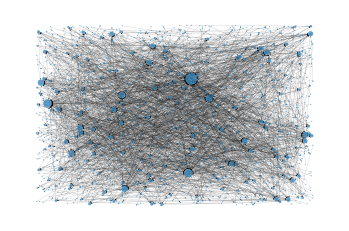

In [22]:
# Generando una red de retweet
G_rt = nx.from_pandas_edgelist(
    sotu_retweets,
    source = 'user-screen_name',
    target = 'retweeted_status-user-screen_name',
    create_using = nx.DiGraph())


# Creamos posiciones de diseño aleatorias
pos = nx.random_layout(G_rt)

# Crear list dr comprensión, para cambiar el tamaño de los nodos
sizes = [x[1] for x in G_rt.degree()]

# Dibujamos la red
nx.draw_networkx(G_rt, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Desabilitamos los ejes
plt.axis('off'); plt.show()